# -----------Project------------

## .................Heart Disease Prediction...............

## Muhammad Arham Adeel

# import libraries

In [1]:
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,precision_score,f1_score,recall_score,roc_auc_score
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef
from sklearn import metrics

# machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
import xgboost as xgb

from scipy import stats


In [2]:
dt = pd.read_csv("heart.csv")
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##### here i can check the quick information of our data

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### Checking the null values

In [4]:
dt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Check the Shape of the data

In [5]:
dt.shape

(1025, 14)

In [6]:
rows, columns = dt.shape
print("The total rows/instances in our data is: ", rows)
print("The total columns/labels in our data is: ", columns)

The total rows/instances in our data is:  1025
The total columns/labels in our data is:  14


## Here's the summary statistics of our data

In [7]:
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Now i can separte the numerical columns and categorical columns

In [8]:
df_num = ["age","trestbps","chol","thalach","oldpeak"]
df_cat = ["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]

## here i see the age distribution

H:\download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

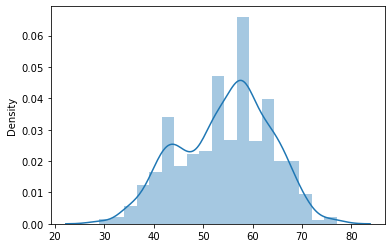

In [9]:
sns.distplot(x= dt["age"])

## here i can see the distribution of  resting bp

H:\download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

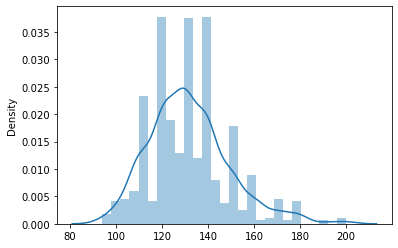

In [10]:
sns.distplot(x= dt["trestbps"])

## here i can see the distribution of cholestrol

H:\download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

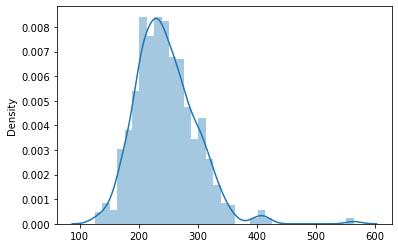

In [11]:
sns.distplot(x= dt["chol"])

## Checking the uniquness and counts in multiple columns

In [12]:
# checking the unique values of the columns
dt["sex"].unique()

array([1, 0], dtype=int64)

In [13]:
dt["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

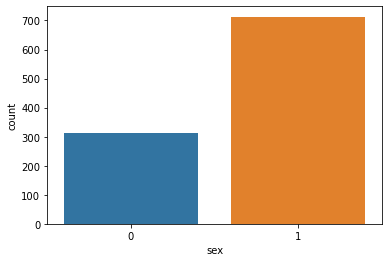

In [14]:
sns.countplot(dt["sex"],data = dt)

H:\download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

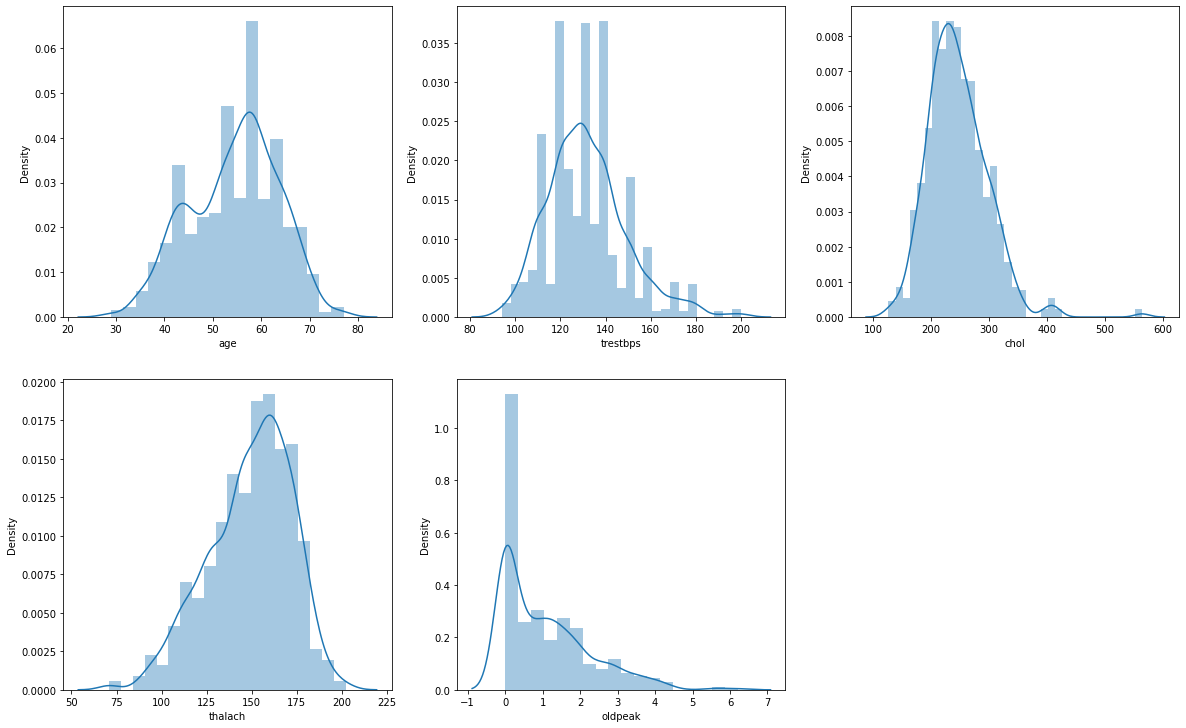

In [15]:
# Plotting Continous/Numerical columns

c = 1
plt.figure(figsize=(20,40))

for j in df_num:
    plt.subplot(6,3,c)
    sns.distplot(dt[j])
    c = c+1
plt.show()

## Distribution of Heart disease (target variable)

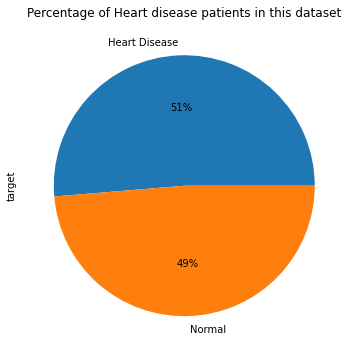

In [16]:
fig = plt.figure(figsize=(14,6))
ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"]);
ax1.set(title = 'Percentage of Heart disease patients in this dataset')
plt.show()

## Gender & Agewise Distribution

H:\download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


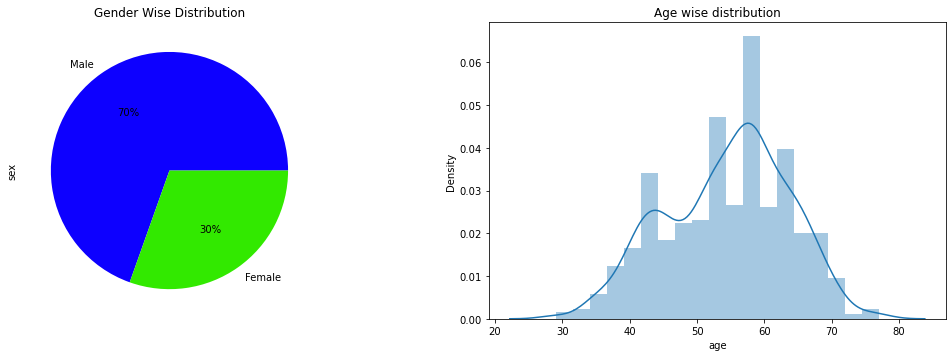

In [17]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),labels=["Male","Female"],)
plt.title("Gender Wise Distribution")

#here i can check the distribution of age

plt.subplot(222)
ax= sns.distplot(dt['age'])
plt.title("Age wise distribution")
plt.show()

## Distribution of Chest Pain Type

H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


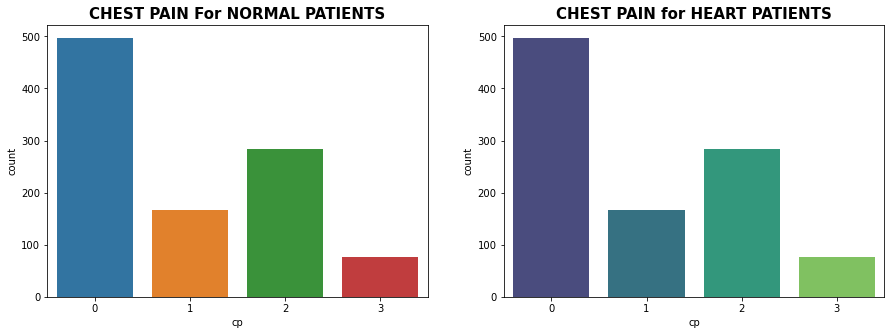

In [18]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(dt['cp'])
plt.title('CHEST PAIN For NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(dt['cp'], palette='viridis')
plt.title('CHEST PAIN for HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

## Distribution of Rest ECG

H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


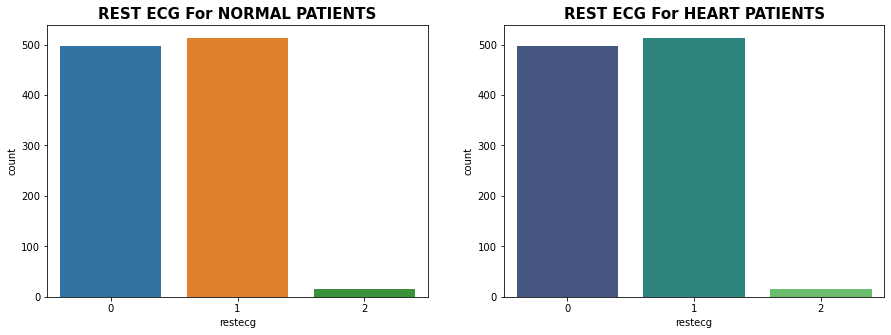

In [19]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(dt['restecg'])
plt.title('REST ECG For NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(dt['restecg'], palette='viridis')
plt.title('REST ECG For HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

## Distribution of slope

H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


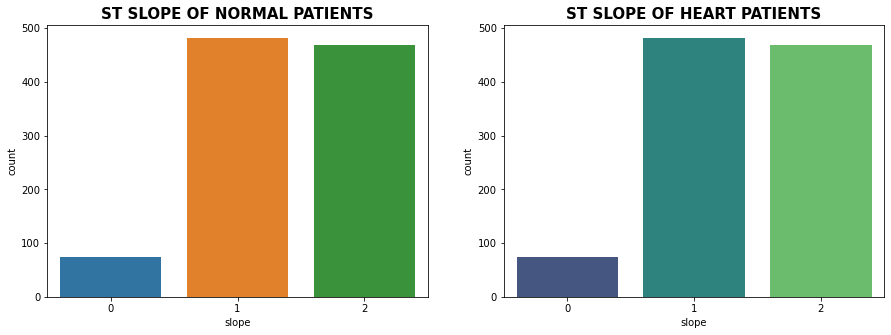

In [20]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(dt['slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(dt['slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

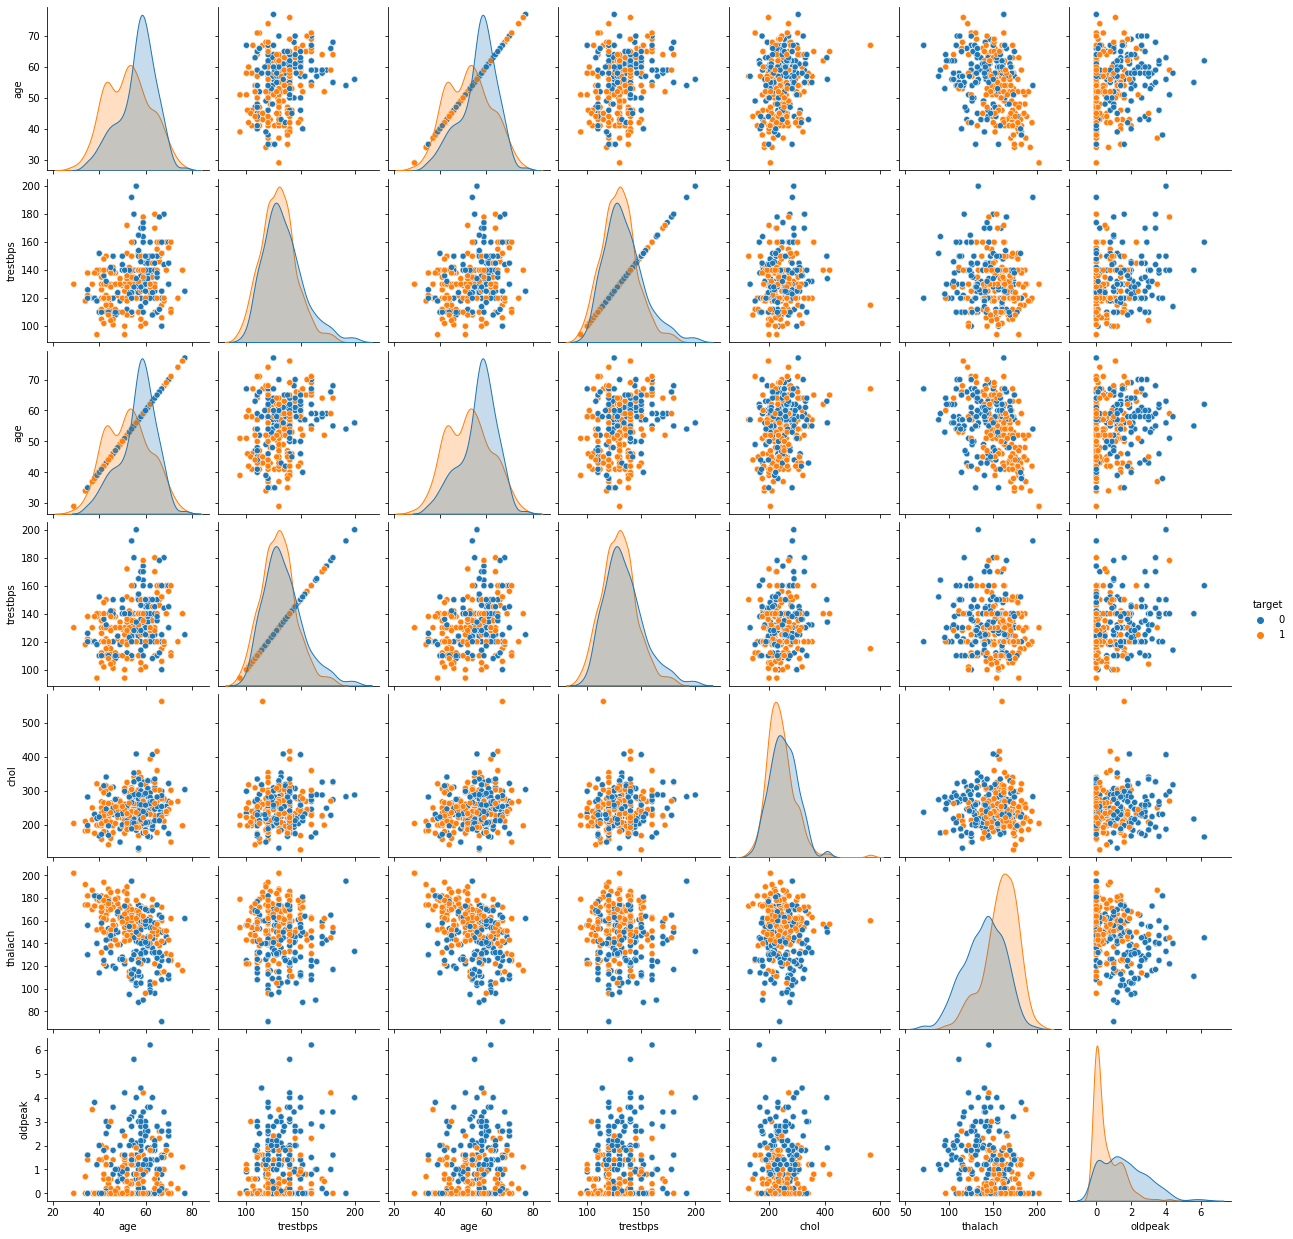

In [21]:
sns.pairplot(dt, hue = 'target', vars = ['age',"trestbps","age","trestbps","chol","thalach","oldpeak"] )


## Here i can draw a scatter plot

<AxesSubplot:xlabel='trestbps', ylabel='chol'>

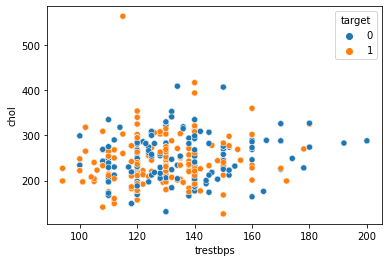

In [22]:
sns.scatterplot(x = 'trestbps', y = 'chol', hue = 'target', data = dt)

<AxesSubplot:xlabel='trestbps', ylabel='age'>

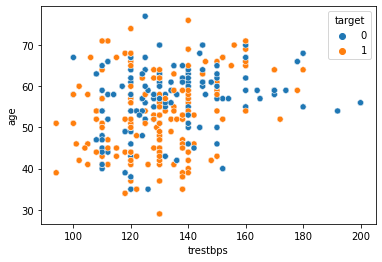

In [23]:
sns.scatterplot( x = 'trestbps', y = 'age', hue = 'target', data = dt)

## Here i can remove the outlier using 

In [24]:
df_num = dt[["age","trestbps","chol","thalach","oldpeak"]]

In [25]:
df_num.head()

,age,trestbps,chol,thalach,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9


### here i can import z score from scipy stas

In [26]:
# calculating zscore of numeric columns in the dataset

from scipy import stats
z = np.abs(stats.zscore(df_num))
print(z)

           age  trestbps      chol   thalach   oldpeak
0     0.268437  0.377636  0.659332  0.821321  0.060888
1     0.158157  0.479107  0.833861  0.255968  1.727137
2     1.716595  0.764688  1.396233  1.048692  1.301417
3     0.724079  0.936037  0.833861  0.516900  0.912329
4     0.834359  0.364875  0.930822  1.874977  0.705408
...        ...       ...       ...       ...       ...
1020  0.503520  0.479107  0.484803  0.647366  0.912329
1021  0.613800  0.377636  0.232705  0.352873  1.471705
1022  0.819834  1.234378  0.562371  1.353113  0.060888
1023  0.488996  1.234378  0.155137  0.429923  0.912329
1024  0.047877  0.663216  1.124743  1.570556  0.279688

[1025 rows x 5 columns]


In [27]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([ 54,  55,  69, 123, 151, 158, 175, 179, 192, 246, 267, 294, 296,
       326, 378, 393, 450, 464, 481, 508, 526, 559, 613, 641, 665, 685,
       688, 833, 889, 958, 996], dtype=int64), array([4, 4, 4, 2, 1, 2, 1, 2, 2, 1, 3, 1, 3, 1, 3, 4, 2, 2, 2, 1, 4, 3,
       4, 2, 2, 2, 1, 4, 2, 2, 2], dtype=int64))


In [28]:
#filtered where threshold is less than 3
dt = dt[(z < 3).all(axis=1)]

In [29]:
dt.shape

(994, 14)

## Correlation

In [30]:
corr = dt.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.087280,-0.069128,0.285929,0.200024,0.122203,-0.126012,-0.392439,0.102357,0.203698,-0.163046,0.272587,0.065701,-0.229328
sex,-0.087280,1.000000,-0.048426,-0.053918,-0.145201,0.049226,-0.091359,-0.042984,0.145504,0.146967,-0.052830,0.155924,0.229561,-0.297362
cp,-0.069128,-0.048426,1.000000,0.065850,-0.108144,0.077960,0.044571,0.297943,-0.401426,-0.143971,0.106634,-0.164602,-0.153447,0.420497
trestbps,0.285929,-0.053918,0.065850,1.000000,0.136774,0.161166,-0.096239,-0.058570,0.050968,0.139878,-0.090646,0.065880,0.022886,-0.110103
chol,0.200024,-0.145201,-0.108144,0.136774,1.000000,0.011746,-0.108515,-0.052669,0.091332,0.053062,-0.010255,0.058614,0.072217,-0.122853
fbs,0.122203,0.049226,0.077960,0.161166,0.011746,1.000000,-0.094645,-0.010288,0.041767,0.005451,-0.059806,0.135036,-0.042327,-0.047673
restecg,-0.126012,-0.091359,0.044571,-0.096239,-0.108515,-0.094645,1.000000,0.075493,-0.071684,-0.033572,0.083985,-0.052260,-0.002379,0.133995
thalach,-0.392439,-0.042984,0.297943,-0.058570,-0.052669,-0.010288,0.075493,1.000000,-0.390851,-0.356368,0.385838,-0.234226,-0.107926,0.425543
exang,0.102357,0.145504,-0.401426,0.050968,0.091332,0.041767,-0.071684,-0.390851,1.000000,0.320477,-0.257997,0.112791,0.193999,-0.442332
oldpeak,0.203698,0.146967,-0.143971,0.139878,0.053062,0.005451,-0.033572,-0.356368,0.320477,1.000000,-0.542918,0.191555,0.165798,-0.435326


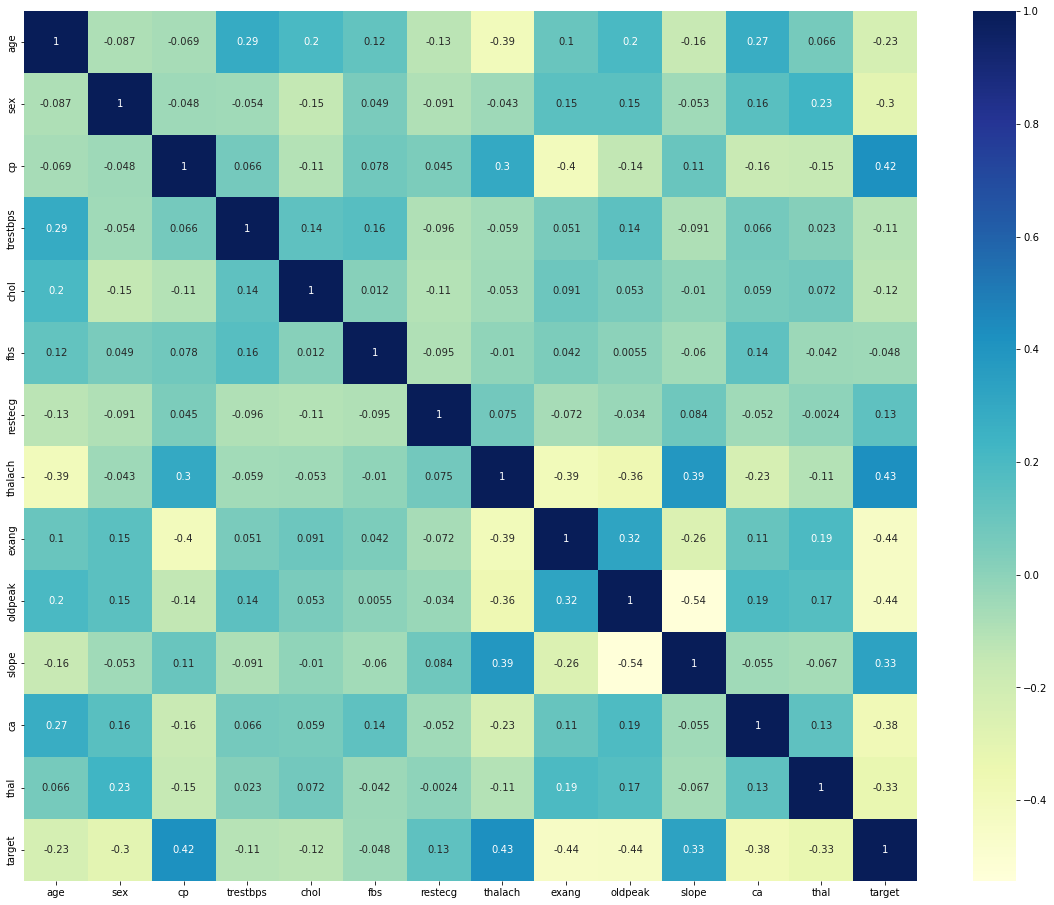

In [31]:
plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

## Draw a boxplot

H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

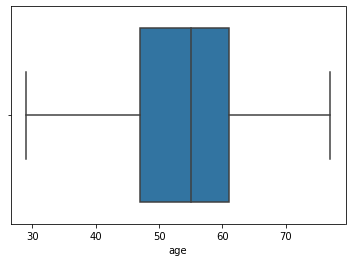

In [32]:
sns.boxplot(dt.age)

H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

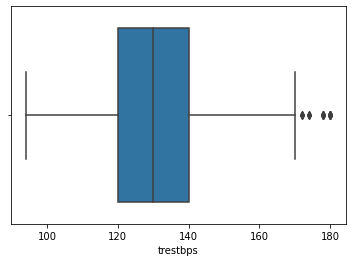

In [33]:
sns.boxplot(dt["trestbps"])

H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

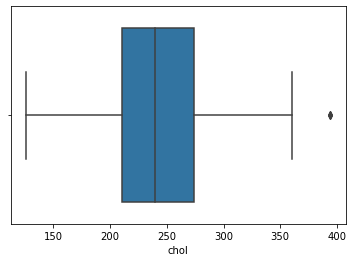

In [34]:
sns.boxplot(dt["chol"])

H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalach'>

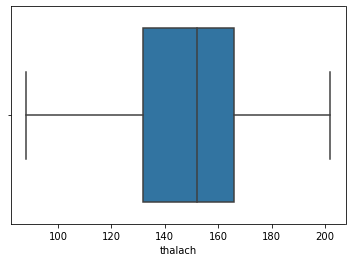

In [35]:
sns.boxplot(dt["thalach"])

H:\download\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalach'>

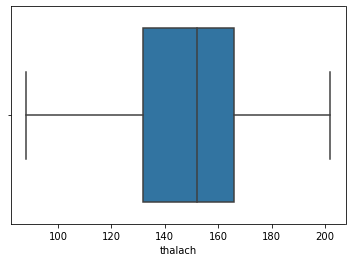

In [36]:
sns.boxplot(dt["thalach"])

In [37]:
dt.groupby(by= "sex").sum()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,16199,302,38668,74132,35,179,44075,67,223.9,424,143,610,220
1,37720,649,91571,167911,111,356,104470,267,784.5,970,589,1686,300


In [38]:
dt.groupby(by= ["sex","cp"]).count()

age  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
sex cp                                                                      
0   0   119       119   119  119      119      119    119      119    119   
    1    57        57    57   57       57       57     57       57     57   
    2   103       103   103  103      103      103    103      103    103   
    3    13        13    13   13       13       13     13       13     13   
1   0   356       356   356  356      356      356    356      356    356   
    1   107       107   107  107      107      107    107      107    107   
    2   175       175   175  175      175      175    175      175    175   
    3    64        64    64   64       64       64     64       64     64   

         ca  thal  target  
sex cp                     
0   0   119   119     119  
    1    57    57      57  
    2   103   103     103  
    3    13    13      13  
1   0   356   356     356  
    1   107   107     107  
    2   175   175     175  
    3    64    64      64

In [39]:
grp = dt.groupby(by= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']).count()
grp.head(20)

age  trestbps  chol  thalach  \
sex cp fbs restecg exang slope ca thal target                                 
0   0  0   0       0     0     2  2    0         4         4     4        4   
                         1     0  2    1        12        12    12       12   
                               2  3    0         3         3     3        3   
                               3  3    0         4         4     4        4   
                         2     0  2    0         4         4     4        4   
                                       1         6         6     6        6   
                               1  2    1         3         3     3        3   
                   1     1     0  2    1         6         6     6        6   
                                  3    0         4         4     4        4   
           1       0     1     0  2    1         8         8     8        8   
                               2  2    1         3         3     3        3   
                         2     0  2    1        11        11    11       11   
                               2  2    1         3         3     3        3   
                   1     1     0  2    0         9         9     9        9   
                                  3    0         6         6     6        6   
                               2  2    0         4         4     4        4   
                         2     0  2    1         6         6     6        6   
           2       1     1     0  2    0         4         4     4        4   
                               1  3    0         4         4     4        4   
       1   0       1     1     0  3    0         4         4     4        4   

                                               oldpeak  
sex cp fbs restecg exang slope ca thal target           
0   0  0   0       0     0     2  2    0             4  
                         1     0  2    1            12  
                               2  3    0             3  
                               3  3    0             4  
                         2     0  2    0             4  
                                       1             6  
                               1  2    1             3  
                   1     1     0  2    1             6  
                                  3    0             4  
           1       0     1     0  2    1             8  
                               2  2    1             3  
                         2     0  2    1            11  
                               2  2    1             3  
                   1     1     0  2    0             9  
                                  3    0             6  
                               2  2    0             4  
                         2     0  2    1             6  
           2       1     1     0  2    0             4  
                               1  3    0             4  
       1   0       1     1     0  3    0             4

In [40]:
dt.groupby(by= "target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.430380,0.848101,0.502110,132.955696,249.432489,0.164557,0.464135,139.409283,0.554852,1.510127,1.191983,1.139241,2.523207
1,52.251923,0.576923,1.371154,129.265385,238.100000,0.130769,0.605769,158.586538,0.136538,0.562692,1.594231,0.369231,2.115385


<AxesSubplot:xlabel='target'>

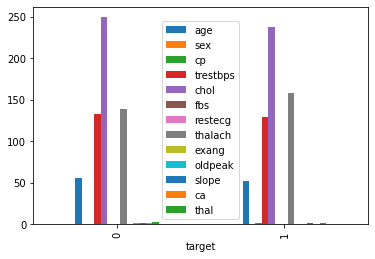

In [41]:
dt.groupby(by= "target").mean().plot(kind= 'bar')

### checking the unique values of each column

In [42]:
dt["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

In [43]:
dt["cp"].value_counts()

0    475
2    278
1    164
3     77
Name: cp, dtype: int64

In [44]:
dt["fbs"].value_counts()

0    848
1    146
Name: fbs, dtype: int64

In [45]:
dt["restecg"].value_counts()

1    505
0    474
2     15
Name: restecg, dtype: int64

In [46]:
dt["exang"].value_counts()

0    660
1    334
Name: exang, dtype: int64

In [47]:
dt["slope"].value_counts()

1    468
2    463
0     63
Name: slope, dtype: int64

In [48]:
dt["ca"].value_counts()

0    567
1    220
2    127
3     62
4     18
Name: ca, dtype: int64

In [49]:
dt["thal"].value_counts()

2    537
3    386
1     64
0      7
Name: thal, dtype: int64

In [50]:
dt["target"].value_counts()

1    520
0    474
Name: target, dtype: int64

In [51]:
X = dt.drop(columns="target")
y = dt["target"]

In [52]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [53]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [54]:
print(f"Feature Matrix X shape {X.shape}")
print(f"Target Vector y shape {y.shape}")

Feature Matrix X shape (994, 13)
Target Vector y shape (994,)


## Model training and evaluation

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    412
0    383
Name: target, dtype: int64
Distribution of traget variable in test set
1    108
0     91
Name: target, dtype: int64


In [57]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(795, 13)
(795,)
------------Test Set------------------
(199, 13)
(199,)


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[["age","trestbps","chol","thalach","oldpeak"]] = scaler.fit_transform(X_train[["age","trestbps","chol","thalach","oldpeak"]])
X_train.head()

H:\download\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
937,0.729167,1,2,0.534884,0.779851,0,1,0.614035,0,0.000000,2,0,2
953,0.333333,0,0,0.511628,0.410448,0,0,0.561404,1,0.045455,1,0,2
686,0.479167,1,0,0.395349,0.291045,1,1,0.596491,1,0.227273,1,0,0
791,0.520833,1,0,0.186047,0.421642,0,1,0.333333,1,0.636364,1,1,3
939,0.416667,0,1,0.465116,0.541045,0,1,0.649123,0,0.000000,1,0,2


In [59]:
X_test[["age","trestbps","chol","thalach","oldpeak"]] = scaler.transform(X_test[["age","trestbps","chol","thalach","oldpeak"]])
X_test.head()

H:\download\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
948,0.854167,1,0,0.593023,0.179104,0,1,0.324561,1,0.590909,0,0,3
546,0.854167,1,0,0.418605,0.731343,0,0,0.184211,0,0.545455,1,3,2
589,0.520833,1,0,0.325581,0.597015,0,0,0.245614,1,0.727273,1,2,2
681,0.625000,1,0,0.883721,0.746269,0,0,0.456140,1,0.772727,0,0,3
955,0.687500,1,2,0.418605,0.391791,0,1,0.508772,0,0.409091,1,3,3


In [60]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [61]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.847848 (0.033783)
KNN7: 0.854114 (0.031305)
KNN9: 0.870491 (0.044680)
CART: 0.987405 (0.015962)
NB: 0.816377 (0.015779)
SVM Linear: 0.836519 (0.037641)
SVM RBF: 0.884320 (0.040066)
RF_Ent100: 0.983623 (0.018749)
RF_Gini100: 0.982358 (0.016137)
ET100: 0.984889 (0.016710)
XGB_100: 0.986155 (0.015355)


### Random Forest Classifier (criterion = 'entropy')

In [62]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Draw the Confusion matrix

,Model,Accuracy,Precision,Recall_Score,F1 Score,ROC,mathew_corrcoef,Log Loss
0,Random Forest,1.0,1.0,1.0,1.0,1.0,1.0,9.992007e-16


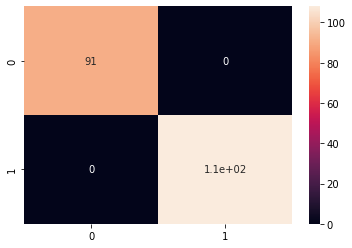

In [63]:
cm=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(cm, annot=True)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
loss_log = log_loss(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec, f1,roc,mathew,loss_log]],
               columns = ['Model', 'Accuracy','Precision', 'Recall_Score', 'F1 Score','ROC','mathew_corrcoef',"Log Loss"])

model_results

### Soft voting

In [64]:
import xgboost as xgb
clf1=RandomForestClassifier(criterion='entropy',n_estimators=100)

clf2=DecisionTreeClassifier()
clf3=xgb.XGBClassifier(n_estimators= 1000)
clf4=ExtraTreesClassifier(n_estimators= 500)

clf5=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')


eclf1 = VotingClassifier(estimators=[('rfe', clf1), ('decc', clf2), ('xgb', clf3),('ET',clf4),('gb',clf5),], 
                         voting='soft', weights=[4,1,2,3,1])
eclf1.fit(X_train,y_train)
y_pred_sv =eclf1.predict(X_test)

,Model,Accuracy,Precision,Recall Score,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.984925,0.972973,1.0,0.986301,0.983516,0.520697,0.969998


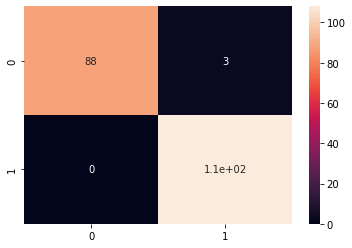

In [65]:
CM=confusion_matrix(y_test,y_pred_sv)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
loss_log = log_loss(y_test, y_pred_sv)
acc= accuracy_score(y_test, y_pred_sv)
roc=roc_auc_score(y_test, y_pred_sv)
prec = precision_score(y_test, y_pred_sv)
rec = recall_score(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)

mathew = matthews_corrcoef(y_test, y_pred_sv)
model_results =pd.DataFrame([['Soft Voting',acc, prec,rec, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Recall Score', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [66]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [67]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [68]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et100 = et_100.predict(X_test)

In [69]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 1000)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [70]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [71]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [72]:
data = {
             'Random Forest Entropy': y_pred_rfe, 
                'KNN2': y_pred_knn, 
                'EXtra tree classifier': y_pred_et100,
                'XGB2': y_pred_xgb, 
                'SVC2': y_pred_svc, 
                'CART': y_pred_decc
}

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Recall Score', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Recall Score,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.984925,0.972973,1.000000,0.986301,0.983516,5.206971e-01,0.969998
1,Random Forest Entropy,1.000000,1.000000,1.000000,1.000000,1.000000,9.992007e-16,1.000000
2,KNN2,0.889447,0.898148,0.898148,0.898148,0.888635,3.818401e+00,0.777269
3,EXtra tree classifier,1.000000,1.000000,1.000000,1.000000,1.000000,9.992007e-16,1.000000
4,XGB2,0.984925,0.972973,1.000000,0.986301,0.983516,5.206971e-01,0.969998
5,SVC2,0.819095,0.846154,0.814815,0.830189,0.819495,6.248285e+00,0.637307
6,CART,0.969849,0.972222,0.972222,0.972222,0.969628,1.041382e+00,0.939255
